<a href="https://colab.research.google.com/github/ham952/ioccg/blob/main/IOCCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
excel_file = '/content/drive/MyDrive/IOP_AOP_Sun30.xls'

In [3]:
sheet_name = 'Basics'
# To read all sheets in the Excel file, omit the sheet_name parameter
data_frame = pd.read_excel(excel_file, sheet_name=sheet_name)

'''
# Loop over all sheets in the Excel file
for sheet_name, data_frame in data_frames.items():
    print(sheet_name)
    print(data_frame.head()) # display the first few rows of the data frame
'''
print(data_frame.head())

   wavelength      a_w      bb_w
0         400  0.00663  0.003798
1         410  0.00473  0.003398
2         420  0.00454  0.003048
3         430  0.00495  0.002748
4         440  0.00635  0.002448


In [ ]:
print(data_frame['wavelength'])

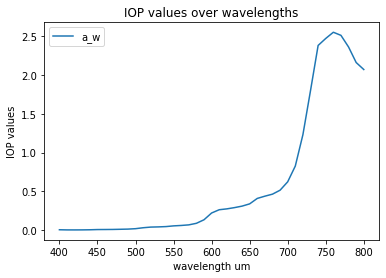

In [5]:
data_frame.plot(kind='line', x='wavelength', y=['a_w'])

# Set the title and axis labels
plt.title('IOP values over wavelengths')
plt.xlabel('wavelength um')
plt.ylabel('IOP values')

# Display the plot
plt.show()

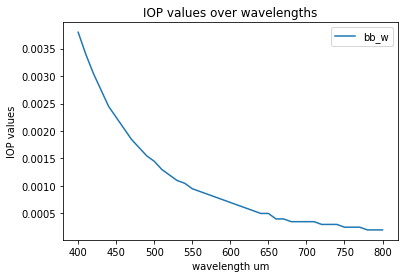

In [6]:
data_frame.plot(kind='line', x='wavelength', y=['bb_w'])

# Set the title and axis labels
plt.title('IOP values over wavelengths')
plt.xlabel('wavelength um')
plt.ylabel('IOP values')

# Display the plot
plt.show()

In [ ]:
sheet_name = 'a_ph'
# To read all sheets in the Excel file, omit the sheet_name parameter
data_frame = pd.read_excel(excel_file, sheet_name=sheet_name)

'''
# Loop over all sheets in the Excel file
for sheet_name, data_frame in data_frames.items():
    print(sheet_name)
    print(data_frame.head()) # display the first few rows of the data frame
'''
print(data_frame.head())

In [8]:
wavelengths = data_frame.columns[1:].values

In [9]:
C = data_frame.iloc[:,0].values

In [10]:
a_ph = data_frame.iloc[0,1:].values

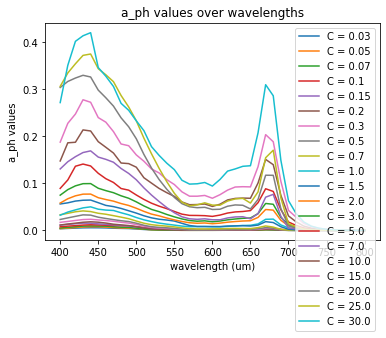

In [11]:
# Set the title and axis labels
plt.title('a_ph values over wavelengths')
plt.xlabel('wavelength (um)')
plt.ylabel('a_ph values')

for i in range(20):
  j = i *25
  a_ph = data_frame.iloc[j,1:].values
  plt.plot(wavelengths,a_ph, label='C = {}'.format(C[j]))

plt.legend()

In [12]:
for i in range(20):
  j = i *25
  print(C[j])


0.03
0.05
0.07
0.1
0.15
0.2
0.3
0.5
0.7
1.0
1.5
2.0
3.0
5.0
7.0
10.0
15.0
20.0
25.0
30.0


In [13]:
sheet_name = 'a'
# To read all sheets in the Excel file, omit the sheet_name parameter
data_frame_a = pd.read_excel(excel_file, sheet_name=sheet_name)

def a(wavelength):
  return data_frame_a[wavelength].values

a_400 = a(400)

In [ ]:
a_440 = a(440)
print(a_440)

In [15]:
sheet_name = 'Rrs'
# To read all sheets in the Excel file, omit the sheet_name parameter
data_frame_rrs = pd.read_excel(excel_file, sheet_name=sheet_name)

def Rrs(wavelength):
  return data_frame_rrs[wavelength].values

Rrs_400 = Rrs(400)

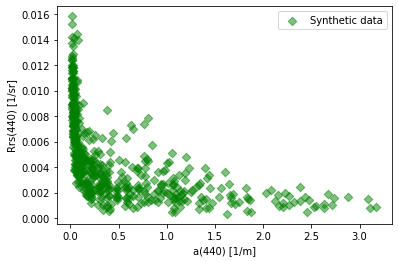

In [16]:
# Dataset Dynamics
a440 = a(440)
Rrs440 = Rrs(440)

plt.xlabel('a(440) [1/m]')
plt.ylabel('Rrs(440) [1/sr]')


plt.scatter(a440,Rrs440, marker = 'D', alpha=0.5, c = 'green', label='Synthetic data')
plt.legend()

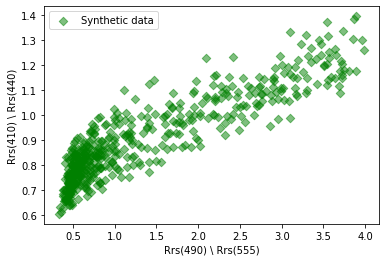

In [17]:
# Dataset Dynamics
Rrs490_Rrs555 = Rrs(490)/Rrs(550)
Rrs410_Rrs440 = Rrs(410)/Rrs(440)


plt.xlabel('Rrs(490) \ Rrs(555)')
plt.ylabel('Rrs(410) \ Rrs(440)')


plt.scatter(Rrs490_Rrs555,Rrs410_Rrs440, marker = 'D', alpha=0.5, c = 'green', label='Synthetic data')
plt.legend()

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

def metrics(known, derived):

  # create two arrays of actual and predicted values
  a_known = known
  a_derived = derived

  # calculate the mean of actual values
  a_known_mean = np.mean(a_known)

  # calculate the sum of squares of differences of actual values from their mean
  tss = np.sum(np.square(a_known - a_known_mean))

  # calculate the sum of squares of differences between actual and predicted values
  rss = np.sum(np.square(a_known - a_derived))

  # calculate R2 score
  r2 = 1 - (rss / tss)

  # calculate RMSE score
  #rmse = np.sqrt(mean_squared_error(a_known, a_derived))
  rmse = np.sqrt(np.sum( (np.log10(a_derived)-np.log10(a_known))**2) /len(a_known))


  return r2, rmse


In [176]:
def plotting (known, derived, r2, rmse, textpos_r2 = 2.7, textpos_rmse = 2.5):
  # Define the x-axis scale values
  x_values = [0,0.03, 0.1, 0.3, 1, 3]

  # Set the range of x-values to use
  xmin, xmax = -0.1, 3

  # Generate a set of equally spaced x-values
  x_ticks = np.linspace(xmin, xmax, len(x_values))

  # Set the x-axis tick positions and labels
  # plt.xticks(x_ticks, x_values)
  # plt.yticks(x_ticks, x_values)

  plt.xlabel('Known a(440) [1/m]')
  plt.ylabel('Derived a(440) [1/m]')

  plt.text(0,textpos_r2,s='R2 = '+ f'{r2:0.3f}')
  plt.text(0,textpos_rmse,s='RMSE = '+ f'{rmse:0.3f}')

  # Plot the data
  plt.scatter(known, derived)

  plt.plot([0.01,3], [0.01,3],  alpha=0.5,)

  plt.show()

# **Chapter 4**
# **Simple Algorithms for Absorption Coefficients**

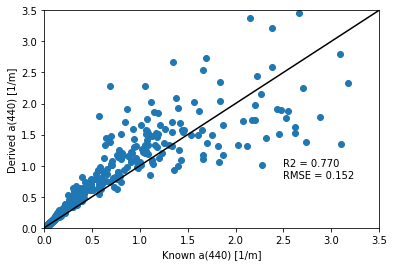

In [169]:
# One-Step Spectral Ratio Algorithm
# Lee et al. (1998b)

A0 = -0.674
A1 = -0.531
A2 = -0.745

B1 = -1.469
B2 = 2.375

Rrs_555 = np.mean([Rrs(550),Rrs(560)], axis=0)
#Rrs_555 = Rrs(550)

p25 = np.log10(Rrs(440)/Rrs_555)
p35 = np.log10(Rrs(490)/Rrs_555)

log_a440 = A0 + A1*p25 + A2*(p25)**2 + B1*p35 + B2*(p35)**2

#a440_derived = np.exp(log_a440) 
a440_derived = 10**log_a440 

a440_known = a(440)

r2, rmse = metrics(a440_known, a440_derived)

plt.xlabel('Known a(440) [1/m]')
plt.ylabel('Derived a(440) [1/m]')
plt.xlim([0, 3.5])
plt.ylim([0, 3.5])

plt.text(2.5,1,s='R2 = '+ f'{r2:0.3f}')
plt.text(2.5,0.8,s='RMSE = '+ f'{rmse:0.3f}')

plt.scatter(a440_known,a440_derived)
plt.plot([0,5], [0,5], 'k-')

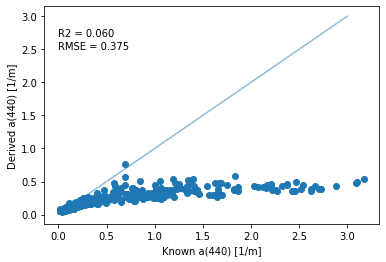

In [187]:
# Spectral Curvature Algorithm
# Barnard et al. (1999).

Y1 = 1.561
Y2 = -0.012
Y3 = 0.319
Y4 = 0.067

lambda1 = 440
lambda2 = 490
lambda3 = 550

R1 = Rrs(lambda1)/Rrs(lambda2)
R2 = Rrs(lambda2)/Rrs(lambda3)

Rrs3 = R1/R2

a490_derived = ( - (Y1*Y4 + Y2*Y3) - np.sqrt( (Y1*Y4 + Y2*Y3)**2 - 4*(Y1*Y3 - (0.975/Rrs3) ) * (Y2*Y4) ) ) / ( 2* (Y1*Y3 - 0.975/Rrs3) )
a440_derived = Y1*a490_derived + Y2

a440_known = a(440)

r2, rmse = metrics(a440_known, a440_derived)

plotting (a440_known, a440_derived, r2, rmse)


In [31]:
print(Rrs(440)[:10])
print()
print(print(Rrs(490)[:10]))
print()
print(Rrs(510)[:10])
print()
print(np.maximum(Rrs(440), Rrs(490), Rrs(510))[:10])
#Rrs(440)

[0.012722  0.008572  0.010238  0.012384  0.011016  0.011373  0.011604
 0.0089127 0.01041   0.011821 ]

[0.0072784 0.005724  0.0065018 0.0087411 0.0065479 0.007002  0.0072635
 0.0054884 0.0067739 0.0080572]
None

[0.0037721 0.0030516 0.0034453 0.0046423 0.003312  0.0036766 0.0037915
 0.0029496 0.003576  0.0043606]

[0.012722  0.008572  0.010238  0.012384  0.011016  0.011373  0.011604
 0.0089127 0.01041   0.011821 ]


In [53]:
excel_file1 = '/content/drive/MyDrive/Andre_Morel.xls'
data_frame_andre = pd.read_excel(excel_file1)

print(data_frame_andre.head())
df = data_frame_andre 
idx = df.index[df['lambda']==430]

df['Kw'][idx].values


   lambda       Kw        e        X
0     400  0.01042  0.64358  0.11748
1     410  0.00812  0.65175  0.12259
2     420  0.00758  0.65917  0.12269
3     430  0.00770  0.66583  0.11779
4     440  0.00885  0.67175  0.10963


array([0.0077])

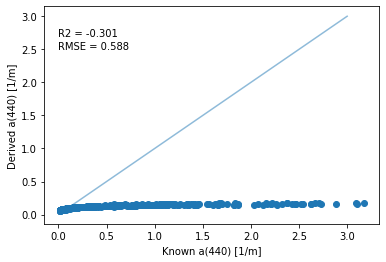

In [188]:
# Spectral-Ratio Algorithm with Chlorophyll Concentration as an Intermediate Link
# Morel and Maritorena, 2001.

excel_file1 = '/content/drive/MyDrive/Andre_Morel.xls'
data_frame_andre = pd.read_excel(excel_file1)

a0 = 0.366
a1 = -3.067
a2 = 1.93
a3 = 0.649
a4 = -1.532

p = np.log10(np.maximum(Rrs(440), Rrs(490), Rrs(510))/ Rrs(560))
C = 10**(a0 + a1*p +a2*p**2 + a3*p**3 + a4*p**4)                # Eq 4.7

# Eq 4.8
def Kd_a(wavelength):
  df = data_frame_andre
  idx = df.index[df['lambda'] == wavelength]

  Kw = df['Kw'][idx].values
  X = df['X'][idx].values
  e = df['X'][idx].values

  Kd = Kw + X*(C**e)    # 500 elements

  R = 6.8 * (Rrs(wavelength))                                 # Eq 4.10
  a = (0.9*Kd *(1-R)) / (1 + 2.25*R)                          # Eq 4.9
  
  return Kd, a

_ , a_derived = Kd_a(440)

a440_derived = a_derived
a440_known = a(440)

r2, rmse = metrics(a440_known, a440_derived)

plotting (a440_known, a440_derived, r2, rmse)

# **Chapter : 5**
# Inversion of IOP based on Rrs and Remotely Retrieved Kd

In [161]:
sheet_name = 'Kd(0)'
# To read all sheets in the Excel file, omit the sheet_name parameter
data_frame_kd = pd.read_excel(excel_file, sheet_name=sheet_name)

def kd(wavelength):
  return data_frame_kd[wavelength].values


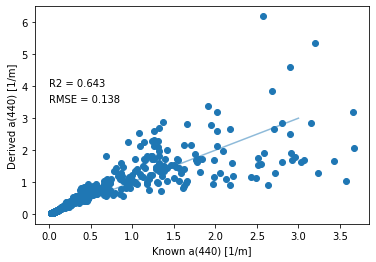

In [179]:
v1 = [-4.7636, -4.6216, -3.6636, -2.0152]
v2 = [-2.1269, -2.3587, -2.3116,-1.5296]
v3 = [3.1752, 3.1235, 2.5648, 1.7751] 
lamda_ = [410, 440, 490, 550]

q = Rrs(440) / Rrs(550)

def kd1(lamda):
  if lamda == 410:
    _lamda = 0
  if lamda == 440:
    _lamda = 1
  if lamda == 490:
    _lamda = 2
  if lamda == 550:
    _lamda = 3
  
  ratio = (v1[_lamda]* np.log10(q) + v2[_lamda]) / (v3[_lamda] + np.log10(q))

  return 10**ratio

kd440_derived = kd1(440)
kd440_known = kd(440) 

r2, rmse = metrics(kd440_known, kd440_derived)

plotting (kd440_known, kd440_derived, r2, rmse, 4,3.5)

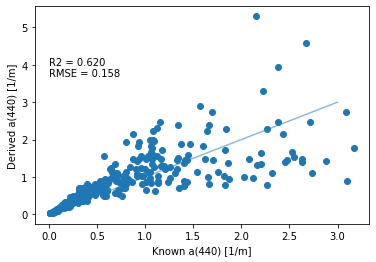

In [185]:
uw = 0.8660     # 30 ?
# uw = 0.9265     # using snells law; 22.089
lamda = 440
a440_derived = (uw * kd1(lamda)) / np.sqrt(1 + (2.54 - 6.5*uw + 19.89*uw**2 )*( Rrs(lamda)/(1-Rrs(lamda)) ) )

a440_known = a(440)

r2, rmse = metrics(a440_known, a440_derived)

plotting (a440_known, a440_derived, r2, rmse, 4,3.7)

In [186]:
sheet_name = 'bb'
# To read all sheets in the Excel file, omit the sheet_name parameter
data_frame_bb = pd.read_excel(excel_file, sheet_name=sheet_name)

def bb(wavelength):
  return data_frame_bb[wavelength].values

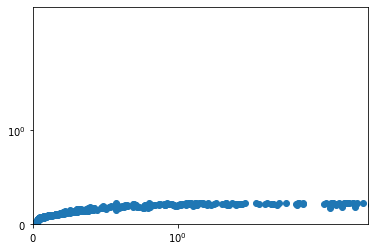

In [159]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x-axis scale values
x_values = [0.01, 0.03, 0.1, 0.3, 1, 3]

# Set the range of x-values to use
xmin, xmax = -0.1, 3

# Generate a set of equally spaced x-values
x_ticks = np.linspace(xmin, xmax, len(x_values))

x = [1.1,1,1.5,2,2.5,2.6]
y = [1.1,1.2,1.7,2,2.5,2.6]

dia = np.linspace(0,3.5,50)
#plt.plot(dia, dia, '-r')
# Plot the data
#plt.scatter(x,y, marker = 'd', alpha=0.5,)
plt.scatter(a440_known, a440_derived)
# Set the x-axis tick positions and labels

plt.xlim((0,3))
plt.ylim((0,3))
#'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'
scale = 'symlog'
plt.xscale(scale)
plt.yscale(scale)
#plt.yticks(x_values)

# Show the plot
plt.show()

